In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime,date,timedelta
import seaborn as sns
import os, warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [98]:
cityTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCity.csv')
ctrTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

In [75]:
continents = ['North America','South America','Europe','Asia','Africa','Australia','Antarcita']

In [108]:
continentTemp = ctrTemp[ctrTemp['Country'].isin(continents)]
continentTemp = continentTemp.dropna()
print(len(countryTemp))
print(len(continentTemp))
countryTemp = ctrTemp[~ctrTemp['Country'].isin(continents)]
countryTemp = countryTemp.dropna()
print(len(countryTemp))
continentTemp.head()

531021
13790
531021


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
5345,1850-01-01,19.764,1.185,Africa
5346,1850-02-01,22.393,1.188,Africa
5347,1850-03-01,23.672,1.954,Africa
5348,1850-04-01,24.197,1.364,Africa
5349,1850-05-01,24.302,0.938,Africa


In [101]:
#North vs South Hemisphere
cityTemp = cityTemp.dropna()
north = cityTemp[cityTemp['Latitude'].str.contains('N')]
south = cityTemp[cityTemp['Latitude'].str.contains('S')]
east = cityTemp[cityTemp['Longitude'].str.contains('E')]
west = cityTemp[cityTemp['Longitude'].str.contains('W')]

north.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [43]:
quadTemp = cityTemp
quadTemp['Year'] = quadTemp['dt'].apply(lambda x : x[:4])
quadTemp['NorthSouth'] = quadTemp['Latitude'].apply(lambda x : 'North' if x.find('N') > -1 else 'South')
quadTemp['EastWest'] = quadTemp['Longitude'].apply(lambda x : 'East' if x.find('E') > -1 else 'West')
quadTemp['Quadrant'] = quadTemp['NorthSouth']+quadTemp['EastWest']
quadTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,NorthSouth,EastWest,NSEW,Quadrant,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,North,East,NorthEast,NorthEast,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,North,East,NorthEast,NorthEast,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,North,East,NorthEast,NorthEast,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,North,East,NorthEast,NorthEast,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,North,East,NorthEast,NorthEast,1744


In [50]:
quadTempAvgCity = quadTemp.groupby(['Quadrant','City']).mean().reset_index(drop=False)
quadTempAvgYear = quadTemp.groupby(['Quadrant','City','Year']).mean().reset_index(drop=False)

print(len(quadTempAvgCity))
print(len(quadTempAvgYear))

3466
684818


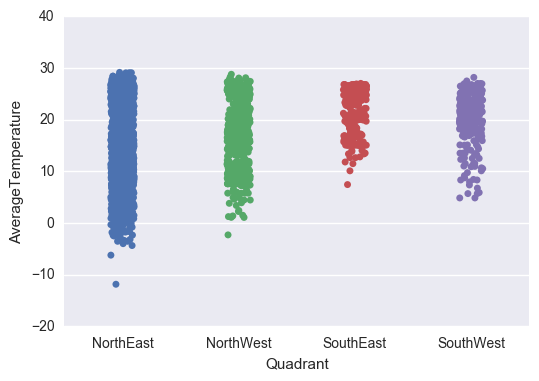

In [51]:
sns.stripplot(x="Quadrant", y="AverageTemperature", data=quadTempAvgCity, jitter=True)

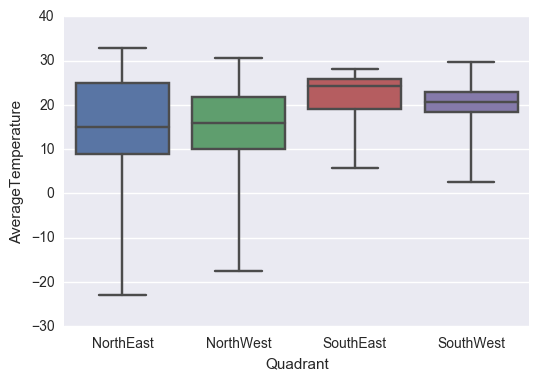

In [52]:
sns.boxplot(x="Quadrant", y="AverageTemperature", data=quadTempAvgYear, whis=np.inf)

In [111]:
continentTemp['Year'] = continentTemp['dt'].apply(lambda x : x[:4])
continentTempAvg = continentTemp.groupby(['Country','Year']).mean().reset_index(drop=False)
continentTempAvg.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty
0,Africa,1850,23.672273,1.135545
1,Africa,1856,23.036000,1.036400
2,Africa,1857,23.324364,0.916000
3,Africa,1858,23.573417,1.003333
4,Africa,1859,23.722333,0.946667


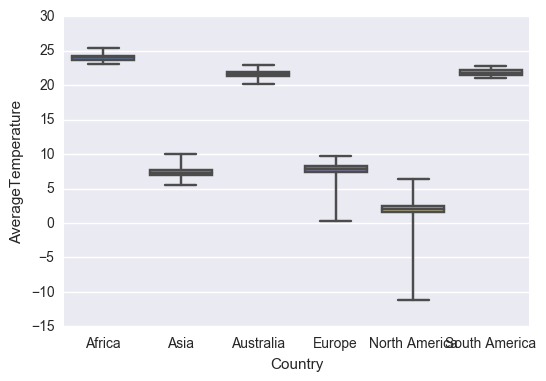

In [113]:
#Average temperautre of 6/7 continents
sns.boxplot(x="Country", y="AverageTemperature", data=continentTempAvg, whis=np.inf)

In [63]:
countryTemp['Year'] = countryTemp['dt'].apply(lambda x : x[:4])
print(len(countryTemp))
countryTempAvg = countryTemp.groupby('Country').mean().reset_index(drop=False)
countryTempAvgYear = countryTemp.groupby(['Country','Year']).mean().reset_index(drop=False)
print(len(countryTempAvg))
print(len(countryTempAvgYear))
countryTempAvg.head()

544811
242
45915


,Country,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,14.045007,0.930162
1,Africa,24.074203,0.395564
2,Albania,12.610646,1.524574
3,Algeria,22.985112,1.176241
4,American Samoa,26.611965,0.541258


In [126]:
#five hottest countries in the world (on average)
hottestCountries = countryTempAvg.sort_values('AverageTemperature', ascending=False).head()
hotCountries = DataFrame()

for each in hottestCountries['Country']:
    holder = countryTemp[countryTemp['Country'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    hotCountries = hotCountries.append(holder)

hotCountriesAvg = hotCountries.groupby(['Country','Year']).mean().reset_index(drop=False)

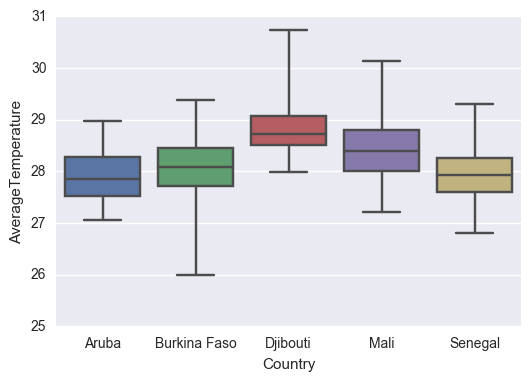

In [127]:
#Top five hottest countries in the world
sns.boxplot(x="Country", y="AverageTemperature", data=hotCountriesAvg, whis=np.inf)

In [128]:
#five coldest countries in the world (on average)
coldestCountries = countryTempAvg.sort_values('AverageTemperature').head()
coldCountries = DataFrame()

for each in coldestCountries['Country']:
    holder = countryTemp[countryTemp['Country'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    coldCountries = coldCountries.append(holder)

coldCountriesAvg = coldCountries.groupby(['Country','Year']).mean().reset_index(drop=False)

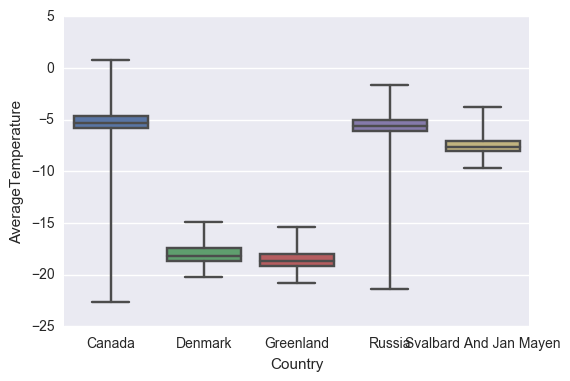

In [129]:
#Top five coldes countries in the world
sns.boxplot(x="Country", y="AverageTemperature", data=coldCountriesAvg, whis=np.inf)